<div hidden=True>
    author: Marco Angius
    company: TomorrowData srl
    mail: marco.anguis@tomorrowdata.io
    notebook-version: oct19
    
</div>

# Hands-on 1: Pandas

This section is meant to learn the most used pandas APIs. 

From the official [site](https://pandas.pydata.org/): 
> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

The examples provided in this notebook are based on data coming from the BTP (*Bureau of Transportation Statistics*) concerning **Air Carrier Statistics** of U.S Carriers retrieved [here](https://www.transtats.bts.gov/tables.asp?Table_ID=258&SYS_Table_Name=T_T100D_MARKET_US_CARRIER_ONLY). 

In detail the dataset is based on the *T-100 Domestic Market*: 
> This table contains domestic market data reported by U.S. air carriers, including carrier, origin, destination, and service class for enplaned passengers, freight and mail when both origin and destination airports are located within the boundaries of the United States and its territories.
</div>

## T-100 Domestic Market Dataset


Details of selectable fields for the downloaded table can be found [here](https://www.transtats.bts.gov/DL_SelectFields.asp). 

The pre-downloaded data has the following columns: 
1. UniqueCarrier
2. UniqueCarrierName
3. CarrierRegion
4. OriginAirportID
5. Origin
6. OriginCityName
7. DestAirportID
8. Dest
9. DestCityName
10. Month
11. Passengeres
12. Freight
13. Mail
14. Distance

Only 2019 data has been downloaded in zip format. 

<hr>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and Manipulate DataFrames with pandas

> Pandas is well suited for many different kinds of data:
>- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
>- Ordered and unordered (not necessarily fixed-frequency) time series data.
>- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
>- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Pandas allows for loading data from different formats (csv, parquet, json, excel...).
The two main data structure used in padas are: 
- `pandas.DataFrame`: 2D labeled, size-mutable structure with heterogeneously -typed columns (tabular data)
- `pandas.Series`: 1D labeled homogeneously-typed array (suited for time series)

<hr>

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 1**
- load the *t100_domestic_market* dataset using the `pd.read_csv()`.
- display information about the dataframe using `df.info()`.
- show the first 5 rows of the dataframe using `df.head()`.

Do columns contain null values?

</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Jupyter Notebooks Tip 1**: you can press `<tab>` to autocomplete or list the possible methods for an object.

</div>

In [2]:
AIRLINE_DATA = "./t100_domestic_market_bts.zip"

In [3]:
df = pd.read_csv(AIRLINE_DATA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122435 entries, 0 to 122434
Data columns (total 12 columns):
PASSENGERS             122435 non-null float64
FREIGHT                122435 non-null float64
MAIL                   122435 non-null float64
DISTANCE               122435 non-null float64
UNIQUE_CARRIER         122435 non-null object
UNIQUE_CARRIER_NAME    122435 non-null object
ORIGIN_AIRPORT_ID      122435 non-null int64
ORIGIN                 122435 non-null object
DEST_AIRPORT_ID        122435 non-null int64
DEST                   122435 non-null object
MONTH                  122435 non-null int64
Unnamed: 11            0 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 11.2+ MB


<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Pandas Tip 1**: it is possible to show statistics about the current dataframe `df.describe()` for numerical-only features. 
It provides: 
<ul>
    <li>count: number of non-null samples in the dataframe for the given column</li>
    <li>mean: mean values for the given column</li>
    <li>std: standard deviation for the given column</li>
    <li>min/max: min/max values for the given column</li>
    <li>25%, 50%, 75%: percentiles for the given column</li>
</ul>

Percentiles are useful to check under which value a specified subset (percentage) of the observed data falls.

</div>

<hr>

<div class="alert alert-warning" role="alert">
    
<img src="./icons/new.png"  width="20" height="20" align="left"> &nbsp;  **NumPy** 

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

</div>


<div align="center">Example of slicing in pandas (same while using numpy arrays).</div>
<img src="./images/nparray_slicing.png"  width="900" height="600" align="center">

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 2**

As you have probably observed there is a strange column named `Unnamed: 11`. We can drop it! 
- drop the column using `df.drop()`. Use the *inplace* parameter if you want!

<br>

The general syntax for slicing a collection in python is `[start:stop:step]`. If start or stop is omitted the default value is the first or last element respectively.  


- show the first five rows to see if the column is still present. Use slicing `df[:5]`.
- what if we want to show the last 5 rows? 
- what about the last 5 rows in descending order?

<br>

Once indexed, it is possible to locate rows by means of their integer position (use `DataFrame.iloc[]`) or by means of the index value (use `df.loc[]`). 

- set an index, for example the *UNIQUE_CARRIER* column. Use `df.set_index()`.
- now try to find all rows related with the carrier id *27Q*. 

</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Jupyter Notebooks Tip 2**: you can press `<left-shift> + <tab>` while the cursor is in between a function parenthesis to show the doc related with it

</div>

<hr>

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 3** 

A column in a panda *DataFrame* can contain whatever type, also python list or dictionaries.

It is also possible to select a single column or a subset of the columns. In any case, when a single column is selected what is returned is a `pandas.Series` object. Instead when multiple columns are selected a `pandas.DataFrame` is returned.

- select the *UNIQUE_CARRIER_NAME* column. Use `df["column_name"]` for selecting a single column.
- select multiple columns by passing a list of column names instead of a single column name.

There is another option available for selecting specific rows. This is done by means of a conditional statement. 

- Check what `df["PASSENGERS"] > 0` returns and save it on a variable. Do you have a clue of what is going on under the hood?
- Then try to select only the rows which satisfies the above condition. Use the variable as argument for the square bracket notation `df[]`.

</div>

<hr>

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 4** 

It is possible to add a column to an existing *DataFrame*. This is useful if we want to compute some statistics or we need some custom filter criteria.

- assigning a new column to an existing DataFrame. Use the syntax `df["new_column"] = ...` to assign a new object to a column. Sum the *PASSENGERS*, *FREIGHT* and *MAIL* columns and assign the summed values to a new column.
- check the results of the new column by getting some samples (try `df.sample(n_sample)`. 
- get the *UNIQUE_CARRIER* values for which the value of the new column is grater than 10'000. Use `Series.unique()` to keep only unique values of a Series object.

Keep in mind that the assigned object should be either a `pandas.Series` or a `numpy.array` object (also python lists are possible). 

</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Pandas Tip 2**: it is possible to retrieve the index of a `pandas.DataFrame` by accessing the `DataFrame.index` attribute. 

</div>

<hr>

## Group by operations
Like in SQL it is possible to perform *group by* operations on a *DataFrame*. This is performed by means of `DataFrame.groupby` method which accept a single column or a list of columns. The returned type is a `DataFrameGroupBy` which has methods to perform operations over the grouped entries. The API for the **GroupBy** objects can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) while the reference user-guide can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 5** 

- find the number of entries for each carrier. Use `DataFrameGroupBy.count()`.
- find the total distance for each of the carrier. Use `DataFrameGroupBy.sum()`.

Which is the carrier with the highest distance?

</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Pandas Tip 3**: due to `df.groupby()` applies only to columns and not index it is needed to reset the current index. Use `df.reset_index()` to achieve the goal. 

</div>

<hr>

## Combining and Merging
It is possible to combine data in pandas in different ways: 
1. `pandas.merge` connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
2. `pandas.concat` concatenates or “stacks” together objects along an axis.

[Here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index) it can be found a full guide on options available for the two methods. 

In [5]:
# preparing mock dataframe for next exercise
df_left = df.drop(columns=["ORIGIN", "DEST"])
df_right = df[["ORIGIN_AIRPORT_ID", "ORIGIN"]].drop_duplicates()
df_right_dest = df[["DEST_AIRPORT_ID", "DEST"]].drop_duplicates().sample(frac=0.7)
df_dropped = df[["ORIGIN", "DEST"]]

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 6** 

- reconcile the information about the origin airport name by merging the prepared left and right dataset with the `pd.merge` pandas api. Merge by **ORIGIN_AIRPORT_ID**
- add the dropped columns *df_dropped* to the *df_left* dataframe in order to reconstruct the original one. Use the `pd.concat` pandas api specifying the `axis` where is wanted to perform the concatenation. 
- from the **df** datataframe create two new dataframes taking the first 30 rows and rows from index 60 to 90 (included) using the already seen slicing operator. Then create a new dataframe adding the two derived ones.

</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Pandas Tip 4**: the `pd.merge` methods takes the left and right dataframes to be merged as parameters. In addition the `on=<columns>` parameter allows for specifying the key for the merge operation otherwise overlapping columns name are taken.

The `how=<left|right|inner|outer>` parameter allows for settings the merging strategy which by default is set to *inner*. 
</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **Pandas Tip 5**: some pandas operations like `df.min`, `df.max` or `pd.concat` allows for specifying the axis where to perform such operation. There are two major aces in pandas: 

- axis 0: representing the rows (index)
- axis 1: representing the columns

</div>

<hr>

## Plotting results
Sometimes it is better to visualize the results we have processed. Pandas *DataFrame* has a `DataFrame.plot()` method which allows for this purpose. The plotting library used by pandas is **matplotlib**. 

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 7** 

- show the number of flies for the different months of the year.
- add the title and change the size of the plot.

</div>

<div class="alert alert-success" role="alert">
    
<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp; **MatplotLib Tip 1**: You can create a new figure with the `f = plt.figure(figsize=[10, 5])` and use it to add a subplot `ax = f.add_subplot()` which returns an *Axes* object. 

Please note:
- The subplot can be passed to `DataFrame.plot()` call. 
- The referenced *Axes* object can then be used to set properties of the plot such as the title.

For more references see the [official api](https://matplotlib.org/3.1.1/api/axes_api.html#axis-labels-title-and-legend) doc for Axes.

</div>

## Homeworks

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 1**:  Plot the top 5 carriers based on their total distance.
[**SOLUTION**](./solutions/handson1/solution_1.py)

</div>

In [13]:
top_5_distance = (
    df[["UNIQUE_CARRIER", "DISTANCE"]] # select only the carrier code and the distance
    .groupby("UNIQUE_CARRIER") # group by distance and apply an aggregation operator
    .sum()
    .sort_values("DISTANCE", ascending=False) # sort the aggregated value 
    .iloc[:5]
)

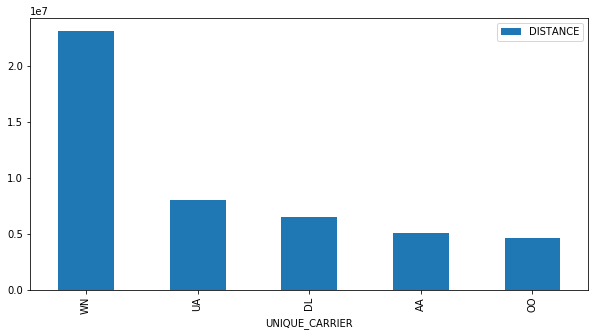

In [14]:
f = plt.figure(figsize=[10, 5])
ax = f.add_subplot()
top_5_distance.plot(kind="bar", ax=ax)

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 2**:  Plot the top 5 destinations based on the total number of passengers in April.
[**SOLUTION**](./solutions/handson1/solution_2.py)
</div>

In [17]:
top_5_passengers_april = (
    df[["DEST_AIRPORT_ID", "PASSENGERS", "MONTH"]] # select the required columns
    .groupby(["DEST_AIRPORT_ID", "MONTH"]) # group by destination airport id and month
    .sum()
    .query("MONTH == 4") # filter out all other months except april
    .sort_values("PASSENGERS", ascending=False) # sort the aggregated value 
    .iloc[:5]
)

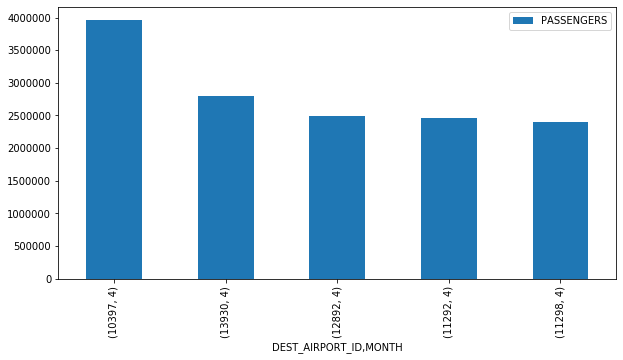

In [18]:
f = plt.figure(figsize=[10, 5])
ax = f.add_subplot()
top_5_passengers_april.plot(kind="bar", ax=ax)

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 3**:  Check the most crowded route (origin - destination) for *PASSENGERS*, *FREIGHT* and *MAIL*.
[**SOLUTION**](./solutions/handson1/solution_3.py)
</div>

In [31]:
# create a new feature (column) for the dataset using the origin and destination
df["ROUTE"] = (
    df[["ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID"]]
    .apply(lambda x: "_".join([str(y) for y in x]), axis=1, raw=True)
)

In [36]:
aggreg_most_crowded = (
    df[["ROUTE", "MAIL", "FREIGHT", "PASSENGERS"]] # select the required columns
    .groupby(["ROUTE"]) # group by the new ROUTE column 
    .sum()
)

In [49]:
# get the top 1 route and take the index
idx_mail = aggreg_most_crowded.MAIL.sort_values(ascending=False).index[0]
# use the original dataset with the route column, set ROOUTE as index and locate the one of interest
df.set_index("ROUTE").loc[idx_mail][["ORIGIN", "DEST"]].iloc[0]

ORIGIN    ANC
DEST      BET
Name: 10299_10551, dtype: object

In [50]:
idx_pass = aggreg_most_crowded.PASSENGERS.sort_values(ascending=False).index[0]
df.set_index("ROUTE").loc[idx_pass][["ORIGIN", "DEST"]].iloc[0]

ORIGIN    LAX
DEST      SFO
Name: 12892_14771, dtype: object

In [51]:
idx_freight = aggreg_most_crowded.FREIGHT.sort_values(ascending=False).index[0]
df.set_index("ROUTE").loc[idx_freight][["ORIGIN", "DEST"]].iloc[0]

ORIGIN    ANC
DEST      SDF
Name: 10299_14730, dtype: object

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 4**:  Check if the number of outgoing passengers equals the total number of incoming passengers in all airports.
[**SOLUTION**](./solutions/handson1/solution_4.py)

</div>

In [81]:
df_outgoing = df[["ORIGIN_AIRPORT_ID", "PASSENGERS"]].groupby("ORIGIN_AIRPORT_ID").sum()
df_outgoing = df_outgoing.reset_index().rename({"PASSENGERS": "OUTGOING"}, axis=1)
df_incoming =  df[["DEST_AIRPORT_ID", "PASSENGERS"]].groupby("DEST_AIRPORT_ID").sum()
df_incoming = df_incoming.reset_index().rename({"PASSENGERS": "INCOMING"}, axis=1)

In [82]:
# merge the two crafted dataframe using  the left_on and the rigth_on parameter of the merge
# pay attention the merging strategy is inner join
df_out_incom = pd.merge(df_outgoing, df_incoming, left_on="ORIGIN_AIRPORT_ID", right_on="DEST_AIRPORT_ID")

In [83]:
df_out_incom["DIFF"] = df_out_incom["OUTGOING"] - df_out_incom["INCOMING"]

In [85]:
df_out_incom.query("DIFF == 0 and OUTGOING > 0")

,ORIGIN_AIRPORT_ID,OUTGOING,DEST_AIRPORT_ID,INCOMING,DIFF
8,10088,2.0,10088,2.0,0.0
49,10309,4.0,10309,4.0,0.0
54,10329,31.0,10329,31.0,0.0
61,10380,13.0,10380,13.0,0.0
74,10440,9.0,10440,9.0,0.0
...,...,...,...,...,...
1027,16537,1.0,16537,1.0,0.0
1030,16543,4.0,16543,4.0,0.0
1033,16569,2.0,16569,2.0,0.0
1047,16843,8.0,16843,8.0,0.0


<div hidden=True>
    <img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/smashicons" title="Smashicons">Smashicons</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>


<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp;Icon made by <a href="https://www.flaticon.com/authors/pixelmeetup" title="Pixelmeetup">Pixelmeetup</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/new.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/pixel-perfect" title="Pixel perfect">Pixel perfect</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/popcorns-arts" title="Icon Pond">Icon Pond</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a></div>

</div>